# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [102]:
#import the necessary modules
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy as sp
from statsmodels.stats import weightstats as stests

In [7]:
#navigate to where the data is located
cd Users\Jai Dave\Documents\Springboard\Mini_Projects\1520467485_dsc_human_temp\EDA_human_temperature

C:\Users\Jai Dave\Documents\Springboard\Mini_Projects\1520467485_dsc_human_temp\EDA_human_temperature


In [20]:
#load the data into a pandas dataframe
df = pd.read_csv('data/human_body_temperature.csv')

In [21]:
# See the head of the dataframe
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


1. Is the distribution of body temperatures normal?
Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test

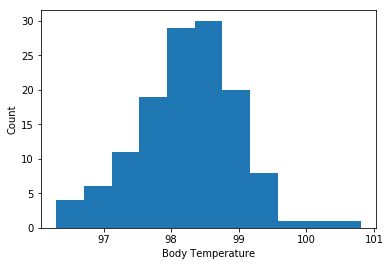

In [36]:
#Plot a histogram of body temperature
plt.xlabel('Body Temperature')
plt.ylabel('Count')
plt.hist(df.temperature, bins = int(np.sqrt(len(df.temperature))))
plt.show()

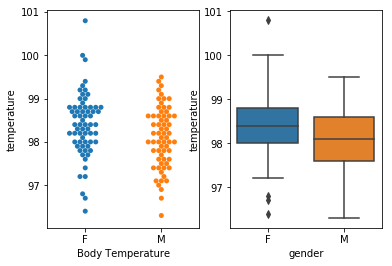

In [38]:
#Create plots of body temperature by gender
plt.subplot(1,2,1)
sns.swarmplot(x = 'gender', y = 'temperature', data = df)
plt.xlabel('Gender')
plt.xlabel('Body Temperature')

plt.subplot(1,2,2)
sns.boxplot(x = 'gender', y = 'temperature', data =df)

From the plots above we can see that the data looks aproximately normally distriubted with a few outliers among the female subgroup. Below I will test the dataset further for normality.

In [41]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

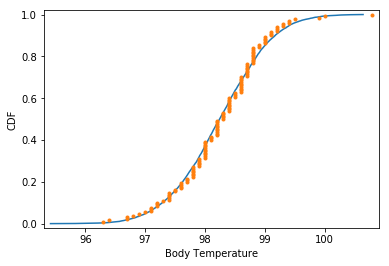

In [44]:
#Create an ecdf of the body temperature from our sample overlaid with an ecdf of numerous samples of the data
samples = np.random.normal(np.mean(df.temperature), np.std(df.temperature), size = 10000)
x_theor, y_theor = ecdf(samples)
x, y = ecdf(df.temperature)
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Body Temperature')
_ = plt.ylabel('CDF')
plt.show()

In [46]:
sp.stats.mstats.normaltest(df.temperature)

NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)

The above test uses D'Agostino's test for normality. The null hypothesis is that the data comes from the normal distribution. Because the p value is .26 we fail to reject the null hypothesis.

This combined with the graph of the ecdf demonstrates that the dataset appears to be normal

2\. Is the sample size large? Are the observations independent?
Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.

In [34]:
#Descriptive statistics of Body Temperature
df[['temperature']].describe()

,temperature
count,130.000000
mean,98.249231
std,0.733183
min,96.300000
25%,97.800000
50%,98.300000
75%,98.700000
max,100.800000


With 130 observations we can determine that the number of samples is sufficiently large.

In [49]:
#Perform a chisquare test for independence between observations
chi2, p = sp.stats.chisquare(df.temperature)
msg = "Test Statistic: {}\np-value: {}"
print( msg.format( chi2, p ) )

Test Statistic: 0.7058062697691894
p-value: 1.0


With a p value of one and 130 observations we can conclude that the observations are independent

3\. Is the true population mean really 98.6 degrees F?
First, try a bootstrap hypothesis test.
Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
In this situation, is it appropriate to use the  tt  or  zz  statistic?
Now try using the other test. How is the result be different? Why?

In [52]:
#Create functions to take bootstrap replicates of our sample data
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [71]:
#Use a bootstrap hypotheis test 
mean_test = 98.6
#Create bootstrap replicates
translated_temp = df.temperature - np.mean(df.temperature) + mean_test
bs_replicates_temp = draw_bs_reps(df.temperature, np.mean, 10000)
bs_replicates_trans = draw_bs_reps(translated_temp, np.mean, 10000)

#Create confidence interval for the mean and calucate the p value to test the probability that the mean of the population is 98.6
conf_int = np.percentile(bs_replicates_temp, [2.5,97.5])
p = np.sum(bs_replicates_trans <= np.mean(df.temperature)) / len(bs_replicates_trans)
print('95% confidence interval =', conf_int, 'degrees F')
print('p = ', p)

95% confidence interval = [98.12230769 98.37461538] degrees F
p =  0.0


Using a bootstrap test we reject the null hypothesis that the true population mean is 98.6. Using a confidence interval we can state with 95% confidence that the mean lies between 98.1 and 98.4.

Because we are comparing the mean of a sample to a value as apposed to comparing means of two different samples we use a one sample test.

I will use the t test because I do not know the standard deviation of the true population

In [107]:
t, p = sp.stats.ttest_1samp(df.temperature,98.6)
print('t =', t)
print("p =", p)

t = -5.4548232923645195
p = 2.4106320415561276e-07


Conducting a t test we reject the null hypothesis that the true population mean is 98.6 degrees F

In [108]:
z, p = stests.ztest(df.temperature, value = 98.6)
print('z =', z)
print("p =", p)

z = -5.4548232923645195
p = 4.9021570141012155e-08


Conducting a z test we also reject the null hypothesis that the true population mean is 98.6. Because we have a large sample size the z stat and t stat are very close.

4\. Draw a small sample of size 10 from the data and repeat both frequentist tests.
Which one is the correct one to use?
What do you notice? What does this tell you about the difference in application of the  tt  and  zz  statistic?

In [110]:
#Optain a sample of size 10 from the data
small_sample = df['temperature'].sample(10)

#Conduct t test because we do not know the population standard deviation and our sample size is small
t, p = sp.stats.ttest_1samp(small_sample,98.6)
print('t =', t)
print("p =", p)

#z test
z, p = stests.ztest(small_sample, value = 98.6)
print('z =', z)
print("p1 =", p)

t = -0.9583148474998514
p = 0.3629382386791572
z = -0.9583148474998514
p1 = 0.3379040191030346


5\. At what temperature should we consider someone's temperature to be "abnormal"?
As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [113]:
bs_replicates_temp = draw_bs_reps(df.temperature, np.mean, 10000)
conf_int = np.percentile(bs_replicates_temp, [2.5,97.5])
print('95% confidence interval =', conf_int, 'degrees F')

95% confidence interval = [98.12230769 98.37307692] degrees F


This confidence interval implies that we can state with 95% confidence that the mean of the population lies between 98.1 and 98.4 degrees F. 

6\. Is there a significant difference between males and females in normal temperature?
What testing approach did you use and why?
Write a story with your conclusion in the context of the original problem.

In [119]:
df_male = df.loc[df['gender'] == 'M']
df_female = df.loc[df['gender'] == 'F']
t, p = sp.stats.ttest_ind(df_male['temperature'], df_female['temperature'])
print('t =', t)
print("p =", p)

t = -2.2854345381656103
p = 0.02393188312239561


Using a two sample t test we can conclude that there is a significant difference between males and females in normal temperatures. I used a two sample t test because we are testing the means of two different samples and we do not know the standard deviation of the population.

As I stated above the female subpopulation contains outliers that may be unnaturally inflating the mean of the body temperature. This could be causing the significant difference. 